# Train example

Use this notebook to train the model.

In [1]:
# Notebook setup

import os
REPO_ROOT = "D:\\play\\kelly-criterion"
os.chdir(REPO_ROOT)
print(f"Working directory: {os.getcwd()}")

Working directory: D:\play\kelly-criterion


In [2]:
# Imports and function definitions

import matplotlib.pyplot as plt
import numpy as np

from src.environment import Environment
from src.agent import Agent

def run_training(train_from_fresh, num_episodes, epsilons, exploring_start=False):
    env = Environment()

    if train_from_fresh:
        agent = Agent(env)

        total_rewards = agent.train(env, episodes=num_episodes, epsilons_each_episode=epsilons,
                                    exploring_start=exploring_start)

        # plot running mean of rewards during training
        running_mean_N = num_episodes // 100
        total_rewards_running_mean = np.convolve(total_rewards, np.ones(running_mean_N) / running_mean_N, mode='valid')
        plt.plot(total_rewards_running_mean, label="Total rewards (running mean with N=100)")

        # plot epsilon decay curve
        plt.plot(epsilons * np.max(total_rewards_running_mean), label="Epsilon decay curve (not to scale)")
        plt.title("Rewards during training")
        plt.xlabel("Episode")
        plt.ylabel("Reward ($)")
        plt.legend()
        plt.show()

        agent.plot_N_values()

    else:
        agent = Agent(Q_values=np.loadtxt("Q.csv"))

    agent.plot_Q_values()

    agent.plot_policy(
        optimal_policy=[min(250 - s, 0.2 * s) for s in range(1, 250)]
    )


def epsilon_picket_fence(num_episodes: int, explore_ratio: float, repeats: int):
    repeating_phase_length = num_episodes // repeats
    single_explore_phase_length = int(repeating_phase_length * explore_ratio)
    single_exploit_phase_length = repeating_phase_length - single_explore_phase_length

    single_repeating_phase = np.concatenate([
        np.ones(single_explore_phase_length),
        np.zeros(single_exploit_phase_length)
    ])

    return np.tile(single_repeating_phase, repeats)


100%|██████████| 80000/80000 [00:09<00:00, 8657.78it/s]
D:\play\kelly-criterion\src\agent.py:95: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(self._N))


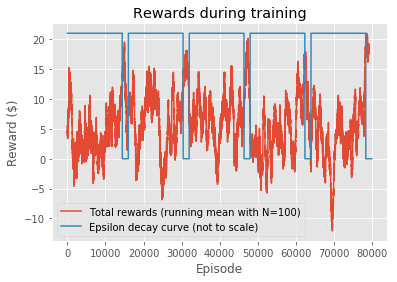

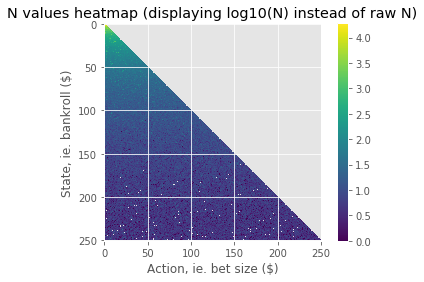

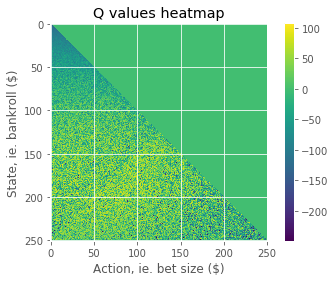

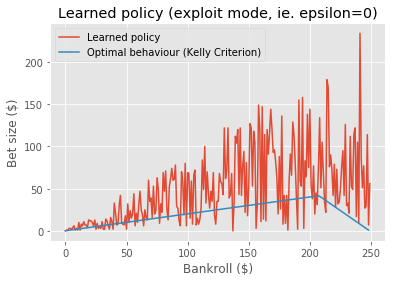

In [3]:
# Run the training

DESIRED_TRAIN_NUM_SECONDS = 10
APPROX_EPISODES_PER_SECOND = 8000

train_num_episodes = APPROX_EPISODES_PER_SECOND * DESIRED_TRAIN_NUM_SECONDS
epsilon_fn = epsilon_picket_fence(num_episodes=train_num_episodes,
                                  explore_ratio=0.9,
                                  repeats=5)

run_training(train_from_fresh=True,
           num_episodes=train_num_episodes,
           epsilons=epsilon_fn,
           exploring_start=True)

